## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from joblib import dump, load

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1XySBMiNfwSgXEbx5FVwTxJw6-XB_-3tg')

In [3]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


## Khám phá dữ liệu

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Xử lý missing value và duplicated

In [7]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [8]:
#df.duplicated()
#df.duplicated().sum()
df.duplicated().values.any()

np.False_

## Thống kê mô tả

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Khởi tạo encoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()


### Tương quan các biến Correlation matrix

In [11]:

correlation_matrix = df.select_dtypes(include=np.number).corr()
print(correlation_matrix)



                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

### Biểu đồ phân tán

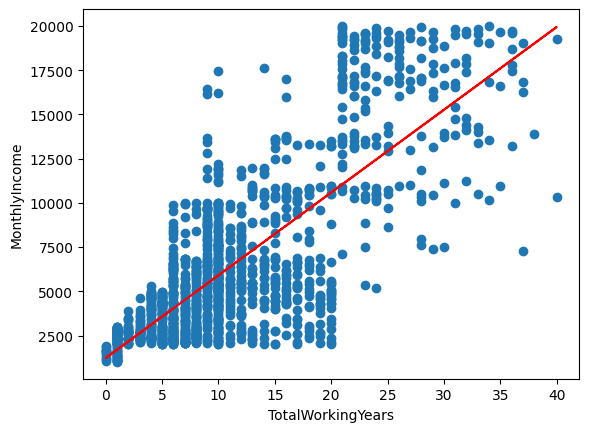

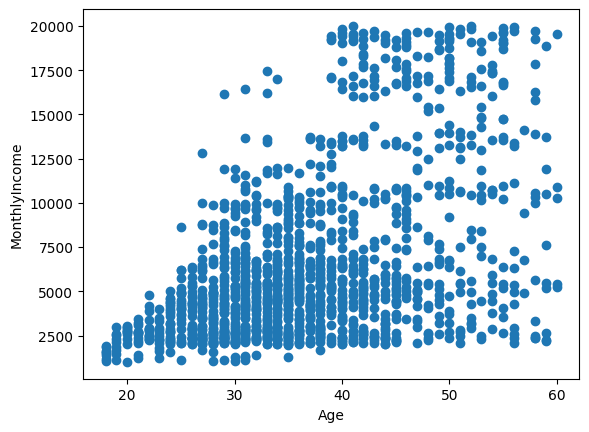

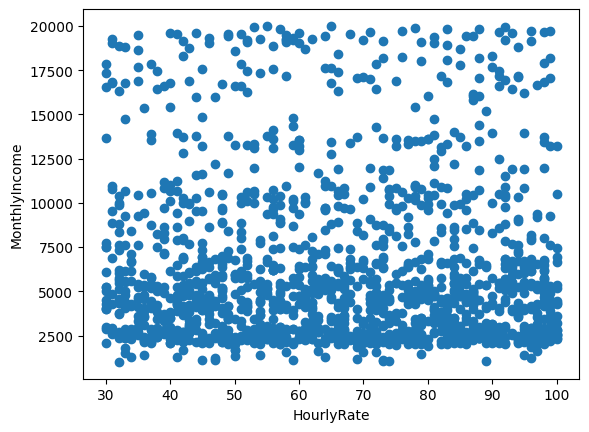

In [12]:
#Trên 3 biểu đồ
plt.scatter(df['TotalWorkingYears'],df['MonthlyIncome'],marker='o')
slope, intercept = np.polyfit(df['TotalWorkingYears'], df['MonthlyIncome'], 1)
#1: phương trình bậc 1
trendline = slope * df['TotalWorkingYears'] + intercept
plt.plot(df['TotalWorkingYears'], trendline, 'r')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.show()

plt.scatter(df['Age'],df['MonthlyIncome'],marker='o')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

plt.scatter(df['HourlyRate'],df['MonthlyIncome'],marker='o')
plt.xlabel('HourlyRate')
plt.ylabel('MonthlyIncome')
plt.show()

Dưới 25 tuổi và dưới 6 năm lao động dù bất cứ công việc nào thì thu nhập cũng ở mức dưới 6.000$/ tháng, tỷ lệ giờ làm việc chiếm đa số trong danh sách này và phân bố đều.

Từ độ tuổi 25 mức thu nhập 6.000$ đến 15.000 $/tháng , số lượng nhân viên bắt đầu nghỉ việc tăng dần đều đến độ tuổi 40, chỉ có số ít người thời gian lao động từ 9 năm trở lên có mức thu nhập hơn 11.000 đến 17.000 / tháng, có số ít nhân viên thời gian lao động từ 15 năm trở lên đạt thu nhập hơn 10.000$ / tháng, đa số thu nhập thấp, tương ứng độ tuổi 35 trở lên, nếu độ tuổi này thu nhập thấp dễ có xu hướng nghỉ việc để tìm việc khác thu nhập cao hơn, nên số năm duy trì công việc hiện tại từ độ tuổi 35 không nhiều.

Từ 41 tuổi trở lên số người lao động ít dần nhưng mức thu nhập phân bố đều từ 2.500$ đến 20.000$/tháng, còn rất ít người có thời gian lao động 21 đến 40 năm có mức thu nhập 10.000$ đến 20.000$/tháng

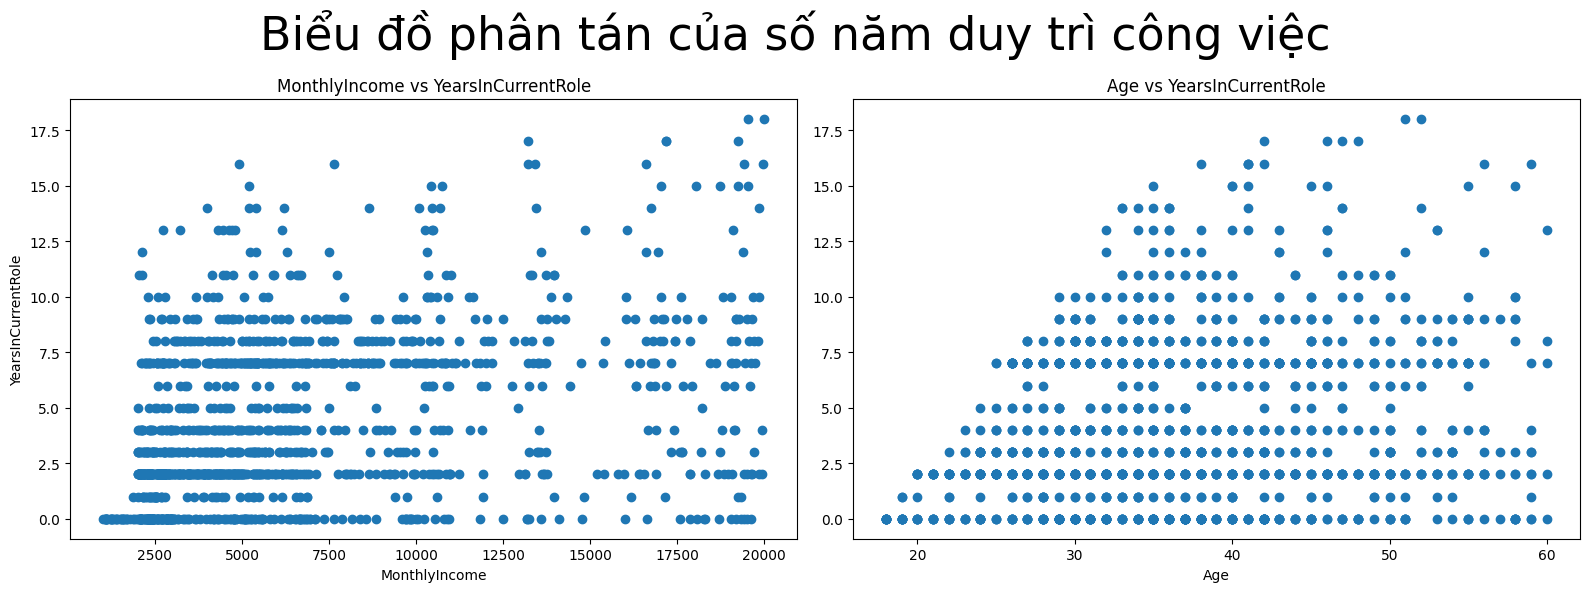

In [19]:
#Subplot 2 biểu đồ/1 figure
fg, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(df['MonthlyIncome'],df['YearsInCurrentRole'],marker='o')
ax[0].set_xlabel('MonthlyIncome')
ax[0].set_ylabel('YearsInCurrentRole')
ax[0].set_title("MonthlyIncome vs YearsInCurrentRole")


ax[1].scatter(df['Age'],df['YearsInCurrentRole'],marker='o')
ax[1].set_xlabel('Age')
ax[1].set_title("Age vs YearsInCurrentRole")

fg.suptitle('Biểu đồ phân tán của số năm duy trì công việc', fontsize=33)
plt.tight_layout();

Đa số nhân viên thu nhập thấp thì thời gian duy trì công việc thấp, độ tuổi dưới 25 tuổi thời gian duy trì công việc không đủ lâu.

Độ tuổi 35 đến 40 có số ít duy trì công việc hiện tại được 13 năm, nên độ tuổi này thu nhập không cao sẽ dễ có xu hướng nghỉ việc hiện tại để tìm việc khác thu nhập cao hơn.

Độ tuổi 40 trở lên có rất ít người duy trì công việc hiện tại hơn 10 năm.

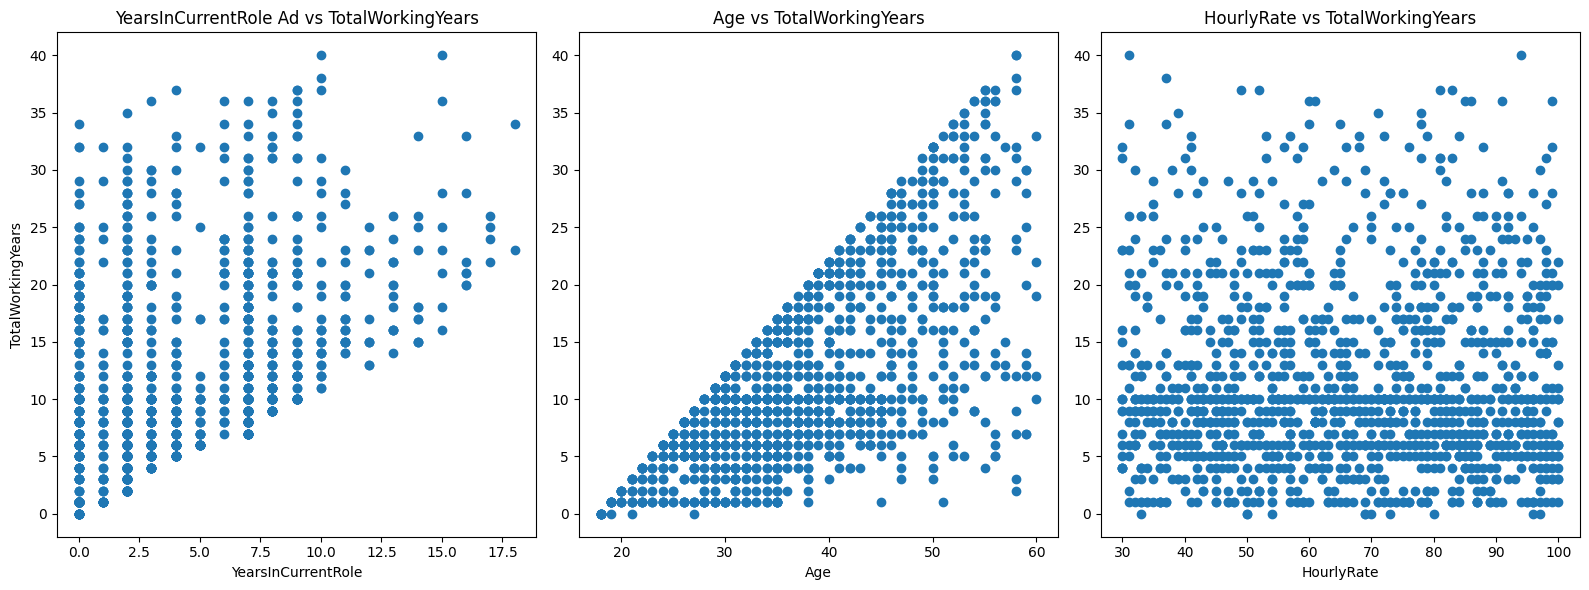

In [ ]:
plt.subplots(1,3,figsize=(16,6))
plt.subplot(1,3,1)
plt.scatter(df['YearsInCurrentRole'],df['TotalWorkingYears'],marker='o')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('TotalWorkingYears')
plt.title("YearsInCurrentRole Ad vs TotalWorkingYears")

plt.subplot(1,3,2)
plt.scatter(df['Age'],df['TotalWorkingYears'],marker='o')
plt.xlabel('Age')
plt.title("Age vs TotalWorkingYears")

plt.subplot(1,3,3)
plt.scatter(df['HourlyRate'],df['TotalWorkingYears'],marker='o')
plt.xlabel('HourlyRate')
plt.title("HourlyRate vs TotalWorkingYears")

plt.tight_layout()
plt.show()

Trong khoảng thời gian 10 năm từ khi bắt đầu lao động có rất ít nhân viên duy trì được 1 việc cố định trong 10 năm đầu, đa số có xu hướng thay đổi công việc.

Độ tuổi 50 đến 60 khả năng nghỉ lao động khá nhiều.

Tỷ lệ giờ làm việc cao với nhóm nhân viên duy trì công việc khoảng 5 đến 10 năm, sau đó giảm dần


### Phân phối của từng biến

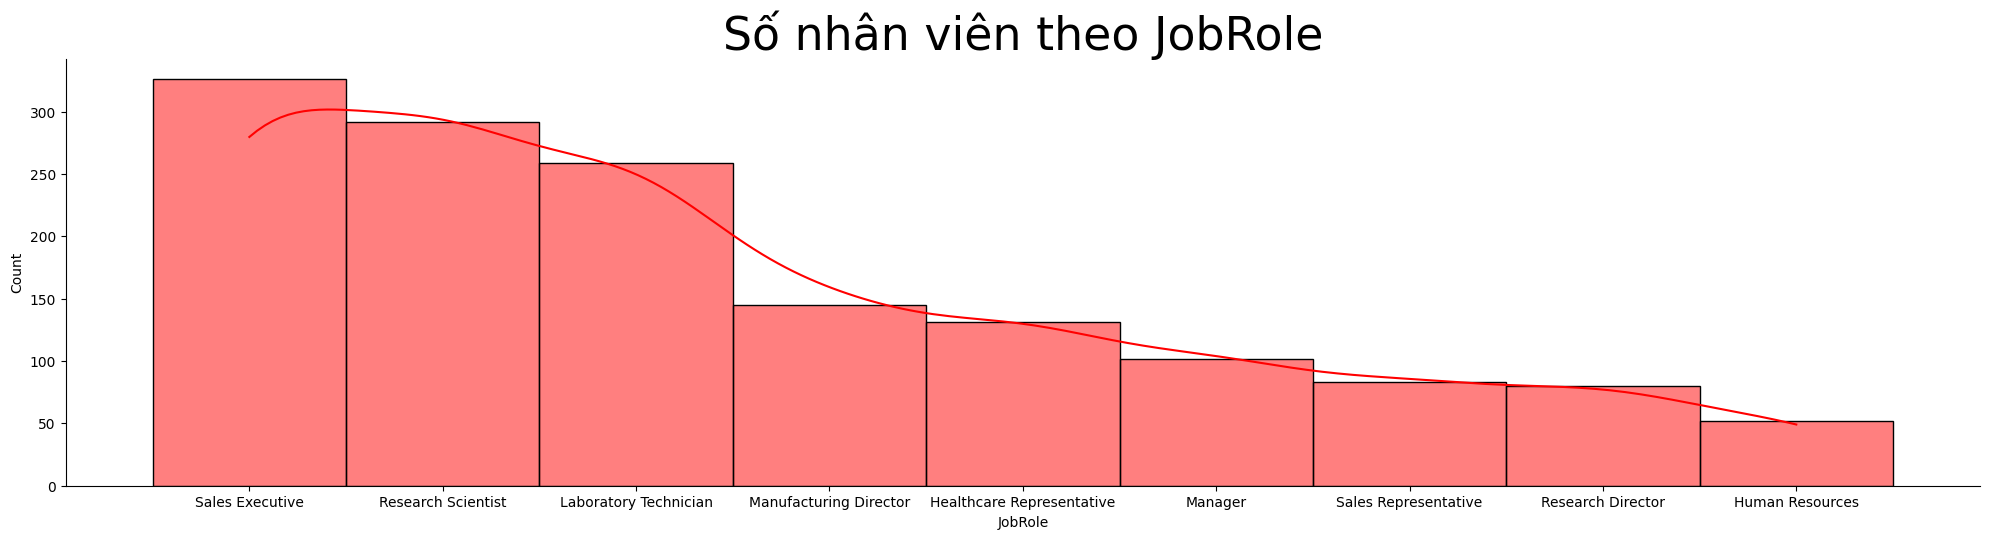

In [ ]:
sns.displot(df['JobRole'],
            bins=9, #chia 9 khoảng
            aspect=4,
            kde=True,
            color='r')

plt.title('Số nhân viên theo JobRole', fontsize=33)
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.show()

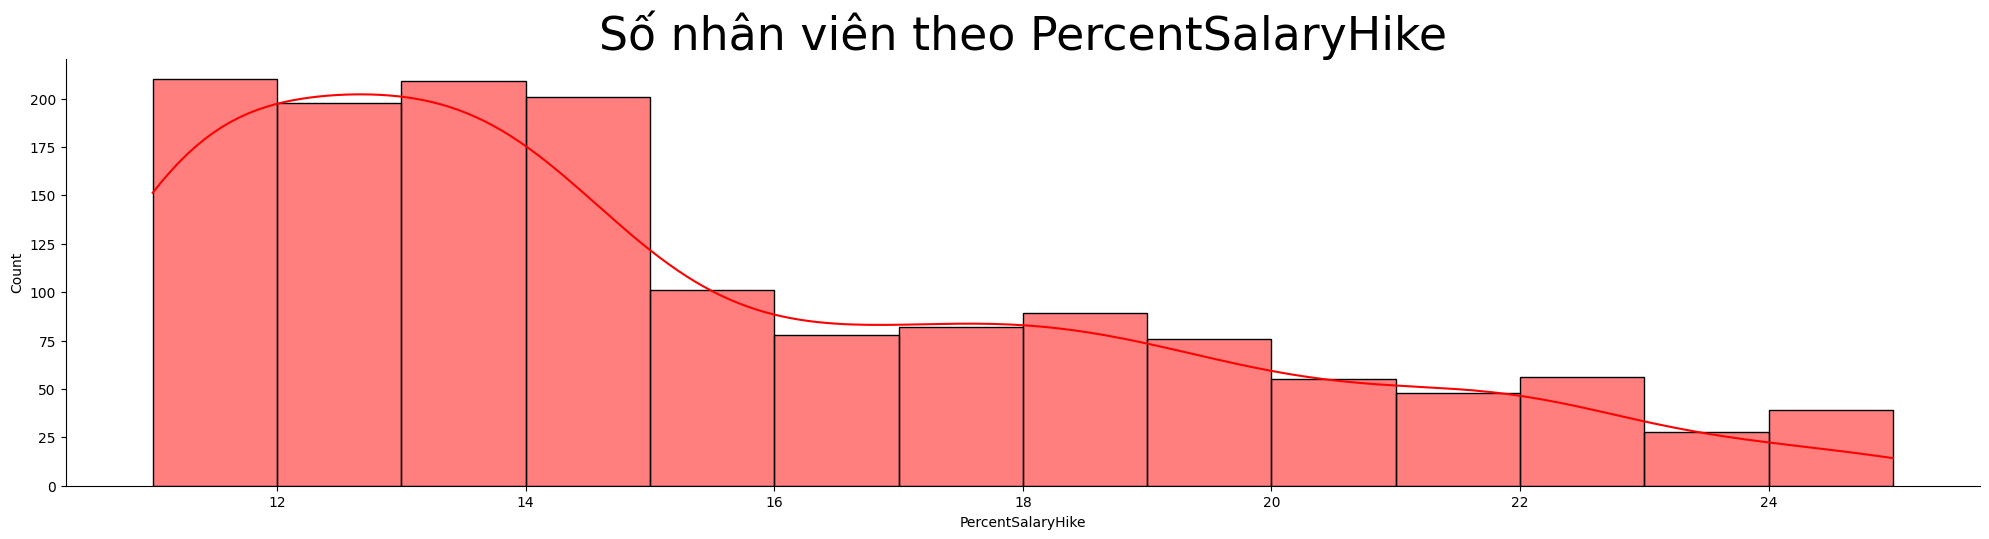

In [ ]:
sns.displot(df['PercentSalaryHike'],
            bins=14, #chia 14 khoảng
            aspect=4,
            kde=True,
            color='r')

plt.title('Số nhân viên theo PercentSalaryHike', fontsize=33)
plt.xlabel('PercentSalaryHike')
plt.ylabel('Count')
plt.show()

<ipython-input-24-5d7054dacc67>:4: FutureWarning: The provided callable <function sum at 0x7a43eadc0cc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(df,


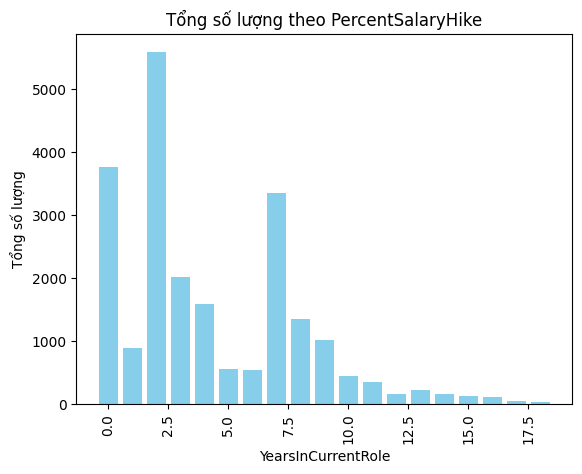

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pivot=pd.pivot_table(df,
                     index=['YearsInCurrentRole'], # Corrected column name
                     #columns=["Product ID"],
                     values="PercentSalaryHike",
                     aggfunc=np.sum)
#pivot=pivot.sort_values(by='Quantity',ascending=True)
pivot

countries = pivot.index
quantities = pivot["PercentSalaryHike"]

# Vẽ biểu đồ thanh
plt.bar(countries, quantities, color='skyblue')

# Thiết lập tiêu đề và nhãn cho các trục
plt.title('Tổng số lượng theo PercentSalaryHike')
plt.xlabel('YearsInCurrentRole') # Corrected label
plt.ylabel('Tổng số lượng')

# Hiển thị các nhãn trục x để dễ đọc
plt.xticks(rotation=90)

# Hiển thị biểu đồ
plt.show()

Khả năng được tăng lương trong khoảng thời gian mới bắt đầu công việc, duy trì công việc hiện tại trong khoảng 2 năm đầu làm việc và năm thứ 7 làm việc, đến năm thứ 8 số nhân viên tăng lương giảm dần nên dễ có xu hướng nghỉ việc

<ipython-input-27-e7e98e0b6021>:4: FutureWarning: The provided callable <function sum at 0x7a43eadc0cc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(df,


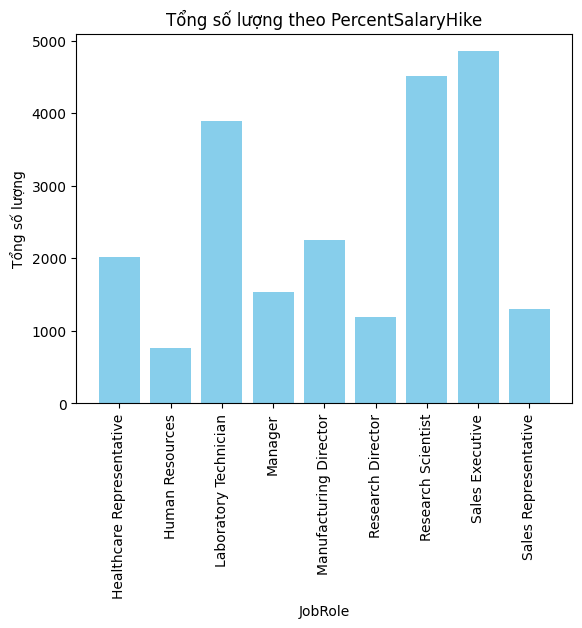

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pivot=pd.pivot_table(df,
                     index=['JobRole'], # Corrected column name
                     #columns=["Product ID"],
                     values="PercentSalaryHike",
                     aggfunc=np.sum)
#pivot=pivot.sort_values(by='Quantity',ascending=True)
pivot

countries = pivot.index
quantities = pivot["PercentSalaryHike"]

# Vẽ biểu đồ thanh
plt.bar(countries, quantities, color='skyblue')

# Thiết lập tiêu đề và nhãn cho các trục
plt.title('Tổng số lượng theo PercentSalaryHike')
plt.xlabel('JobRole') # Corrected label
plt.ylabel('Tổng số lượng')

# Hiển thị các nhãn trục x để dễ đọc
plt.xticks(rotation=90)

# Hiển thị biểu đồ
plt.show()

Khả năng được tăng lương cao với 3 nhóm công việc Laboratory Technician, Research Scientist, Sale Executive, các nhóm còn lại sẽ dễ nghỉ việc  

In [28]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


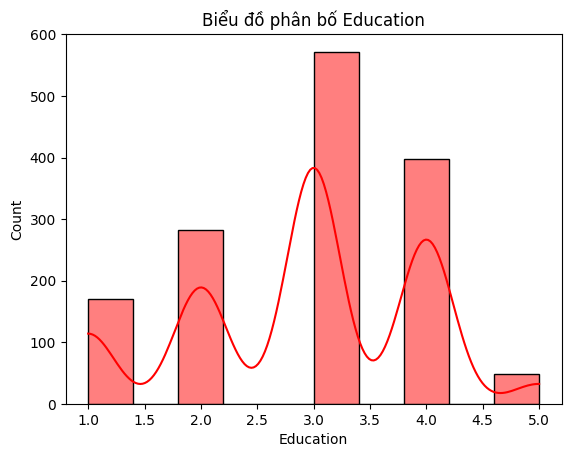

In [29]:
sns.histplot(df['Education'],
            bins=10,
            kde=True,
            color='r')

plt.title('Biểu đồ phân bố Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

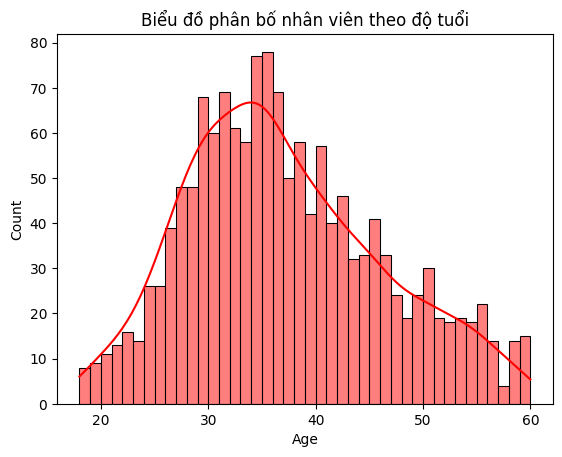

In [31]:
sns.histplot(df['Age'],
            bins=42,
            kde=True,
            color='r')

plt.title('Biểu đồ phân bố nhân viên theo độ tuổi')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='MonthlyIncome'>

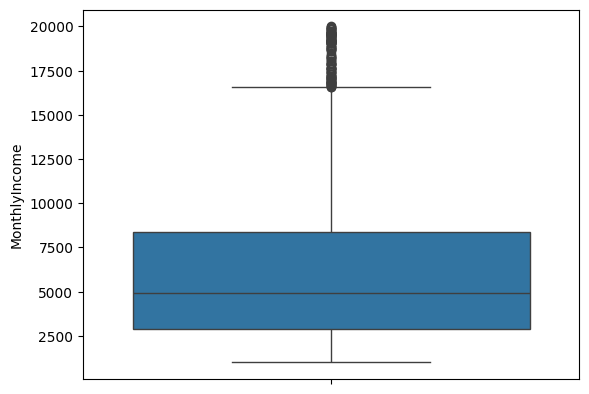

In [32]:
sns.boxplot(data = df, y = df['MonthlyIncome'])

In [33]:
q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outlier = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]
print(outlier)

      Age Attrition     BusinessTravel  DailyRate              Department  \
25     53        No      Travel_Rarely       1282  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
45     41       Yes      Travel_Rarely       1360  Research & Development   
62     50        No      Travel_Rarely        989  Research & Development   
105    59        No         Non-Travel       1420         Human Resources   
...   ...       ...                ...        ...                     ...   
1374   58        No      Travel_Rarely        605                   Sales   
1377   49        No  Travel_Frequently       1064  Research & Development   
1401   55        No      Travel_Rarely        189         Human Resources   
1437   39        No         Non-Travel        105  Research & Development   
1443   42        No      Travel_Rarely        300  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
25   

In [34]:
# Biểu đồ cặp (pairplot) biểu diễn tương quan giữa các cột trong DataFrame df dùng hàm KDE(ước lượng mật độ xác suất)
# Đường chéo hiển thị phân phối của từng biến
sns.pairplot(df,diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

## Huấn luyện

In [35]:
#Biến độc lập
x = df.drop('MonthlyIncome',axis=1)
#Biến phụ thuộc
y = df['MonthlyIncome']

## Chia tập Train | Test

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
x_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
714,50,No,Travel_Rarely,1126,Research & Development,1,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
135,36,No,Travel_Rarely,216,Research & Development,6,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
1271,21,Yes,Travel_Rarely,337,Sales,7,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
477,50,No,Travel_Frequently,1246,Human Resources,3,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
806,52,No,Travel_Rarely,994,Research & Development,7,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,No,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1294,41,No,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
860,22,Yes,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


In [38]:
y_train

,MonthlyIncome
714,17399
135,4941
1271,2679
477,18200
806,10445
...,...
1130,3407
1294,6870
860,2853
1459,4025


In [39]:
x_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,...,4,80,0,6,4,3,5,4,1,3
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,...,3,80,2,5,3,3,4,2,1,3
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,...,3,80,1,1,2,3,1,0,0,0
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,33,No,Travel_Frequently,430,Sales,7,3,Medical,1,1477,...,1,80,2,5,2,3,4,3,0,3
331,27,No,Non-Travel,210,Sales,1,1,Marketing,1,449,...,4,80,1,6,0,3,5,4,1,4
323,28,Yes,Travel_Rarely,1157,Research & Development,2,4,Medical,1,440,...,4,80,0,5,4,2,3,2,2,2
654,39,No,Travel_Rarely,1383,Human Resources,2,3,Life Sciences,1,909,...,3,80,2,13,2,3,5,4,0,4


In [40]:
y_test

,MonthlyIncome
1041,8463
184,4450
1222,1555
67,9724
220,5914
...,...
1047,4373
331,6349
323,3464
654,5204


## Tạo mô hình huấn luyện

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [42]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
feature_course=onehot_encoder.fit_transform(x.iloc[:,1].values.reshape(-1,1))
print(feature_course.shape)

(1470, 2)


# Đánh giá trên tập test
Sử dụng phương thức labelencoder_x.fit_transform(x[:,0]) để học và chuyển đổi các giá trị của cột đầu tiên trong x thành các nhãn số. Điều này có nghĩa là gán một số duy nhất từ 0 đến n_classes - 1 cho mỗi loại trong cột đó, trong đó n_classes là số lượng giá trị duy nhất trong cột đó.

#Gán kết quả của phương thức labelencoder_x.fit_transform cho cột đầu tiên của x, tức là ghi đè các giá trị gốc của x[:,0] bằng các nhãn số.

In [43]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
feature_course=onehot_encoder.fit_transform(x.iloc[:,1].values.reshape(-1,1))
print(feature_course.shape)

labelencoder_x = LabelEncoder()

# Sử dụng iloc để truy cập cột
x.iloc[:, 0] = labelencoder_x.fit_transform(x.iloc[:, 0].ravel())
x

(1470, 2)


<ipython-input-43-159eec57aa1e>:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x.iloc[:, 0] = labelencoder_x.fit_transform(x.iloc[:, 0].ravel())


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,31,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,19,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,15,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,9,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,21,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,9,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,31,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Khai báo hàm train_test_split từ modul sklearn.model_selection. Hàm train_test_split là công cụ dùng để chia dữ liệu thành các tập huấn luyện và kiểm tra.

Sử dụng hàm train_test_split, nhận một mảng đầu vào x và một mảng đầu ra y làm đối số, và trả về bốn tập con: x_train, x_test, y_train, và y_test. Các tập con này đại diện cho các biến đầu vào và đầu ra cho các tập huấn luyện và kiểm tra, tương ứng.

Chỉ định tham số test_size của hàm train_test_split là 0.2. Điều này có nghĩa là 20% dữ liệu sẽ được sử dụng cho tập kiểm tra và 80% cho tập huấn luyện.

Chỉ định tham số random_state của hàm train_test_split là 0, có nghĩa là dữ liệu sẽ được xáo trộn trước khi chia theo cách có thể tái lập. Điều này đảm bảo rằng kết quả sẽ nhất quán qua các lần chạy khác nhau của mã.

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Tạo dữ liệu ngẫu nhiên bằng numpy random
x = np.sort(np.random.rand(80, 1), axis=0)  # Tạo 80 giá trị ngẫu nhiên trong khoảng [0, 1]
y = 2 * x.ravel() + 1 + np.random.normal(0, 0.5, x.shape[0])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Khởi tạo mô hình Decision Tree
model = DecisionTreeRegressor(max_depth=3)  # Giới hạn độ sâu của cây

# Huấn luyện mô hình
model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)


In [46]:
y_test_series = pd.Series(y_test)

y_df = pd.DataFrame(y_pred, index=y_test_series.index)
y_table = pd.concat([y_test_series,y_df],axis=1)
y_table.columns = ['Y_Test','Y_Pred']
y_table

,Y_Test,Y_Pred
0,2.554248,2.230273
1,1.331636,1.816280
2,2.081750,1.816280
3,2.695569,3.882832
4,2.308952,2.230273
5,2.084655,2.860372
6,3.145488,2.860372
7,1.609561,2.860372
8,2.502446,2.230273
9,2.251788,2.860372


In [47]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.499312278348994
MSE 0.3798256224224004
Rsquared: -55.44


In [48]:
features_for_dt = ['TotalWorkingYears', 'Age', 'MonthlyIncome']
x_dt = df[features_for_dt]
y_dt = df['MonthlyIncome']

# Chia nhỏ dữ liệu cho mô hình
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size=0.3, random_state=42)

# Đào tạo mô hình
model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train_dt, y_train_dt)

DecisionTreeRegressor(max_depth=4)

In [49]:
from mlxtend.evaluate import bias_variance_decomp
import numpy as np
mse, bias, var = bias_variance_decomp(model, x_train, y_train, x_test, y_test, loss='mse', num_rounds=200, random_seed=1)

print(mse)
print(bias)
print(var)

0.3946862377555017
0.3298976397060049
0.06478859804949595


In [50]:
#mse = bias + var

#Trực quan kết quả hồi quy theo 1 biến độc lập

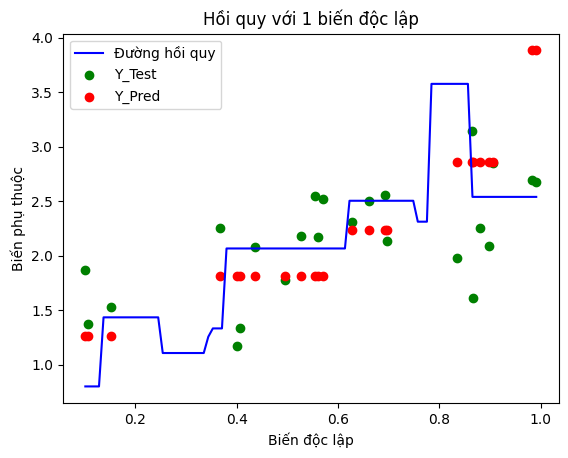

In [51]:
x0_value = np.linspace(x_test[:, 0].min(), x_test[:, 0].max(), 100).reshape(-1, 1)
Y_pred_line = model.predict(x0_value)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x0_value.flatten(), Y_pred_line, color='blue', label='Đường hồi quy')


ax.scatter(x_test[:, 0], y_test, color='green', label='Y_Test')
ax.scatter(x_test[:, 0], y_pred, color='red', label='Y_Pred')
plt.legend()
plt.title('Hồi quy với 1 biến độc lập') # Add a title
plt.xlabel('Biến độc lập') # Add x-label
plt.ylabel('Biến phụ thuộc') # Add y-label
plt.show()

### Trực quan kết quả hồi quy theo 3 biến độc lập

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


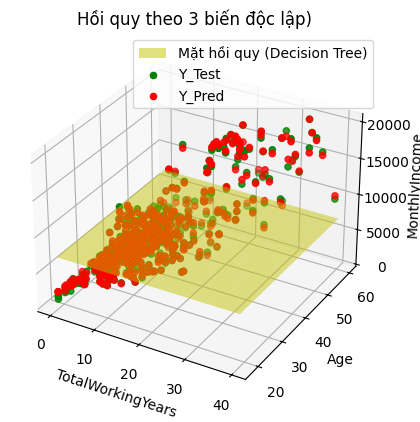

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
# Đào tạo lại mô hình và đưa ra dự đoán trên tập kiểm tra chính xác
if 'df' in globals() and isinstance(df, pd.DataFrame):

    features_for_dt = ['TotalWorkingYears', 'Age', 'MonthlyIncome']
    x_dt = df[features_for_dt]
    y_dt = df['MonthlyIncome']

    # Chia nhỏ dữ liệu cho mô hình
    x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size=0.3, random_state=42)

    # Đào tạo mô hình
    model = DecisionTreeRegressor(max_depth=4)
    model.fit(x_train_dt, y_train_dt)

    # Đưa ra dự đoán về bộ kiểm tra chính xác cho mô hình
    y_pred_dt = model.predict(x_test_dt)
else:
    print("Không tìm thấy DataFrame 'df'.")
    # tính y_pred
    if 'model' in globals() and 'x_test_dt' in globals():
         y_pred_dt = model.predict(x_test_dt)
    else:
        print("dữ liệu thử nghiệm không khả dụng")


# Sử dụng y_pred_dt để vẽ đồ thị
if 'x_test_dt' in globals() and isinstance(x_test_dt, pd.DataFrame) and 'y_test_dt' in globals() and 'y_pred_dt' in globals():
    x0_value = np.linspace(x_test_dt.iloc[:, 0].min(), x_test_dt.iloc[:, 0].max(), 100)
    x1_value = np.linspace(x_test_dt.iloc[:, 1].min(), x_test_dt.iloc[:, 1].max(), 100)
    x2_value = np.linspace(x_test_dt.iloc[:, 2].min(), x_test_dt.iloc[:, 2].max(), 100)

    X0, X1 = np.meshgrid(x0_value, x1_value)

    fixed_x2 = x_test_dt.iloc[:, 2].mean()

    input_points = np.vstack([X0.ravel(), X1.ravel(), np.full(X0.size, fixed_x2)]).T

    Y_pred_grid = model.predict(input_points)
    Y_pred_grid = Y_pred_grid.reshape(X0.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Vẽ mặt hồi quy
    ax.plot_surface(X0, X1, Y_pred_grid, color='yellow', alpha=0.5, label='Mặt hồi quy (Decision Tree)')

    ax.scatter(x_test_dt.iloc[:, 0], x_test_dt.iloc[:, 1], y_test_dt, color='green', label='Y_Test')
    ax.scatter(x_test_dt.iloc[:, 0], x_test_dt.iloc[:, 1], y_pred_dt, color='red', label='Y_Pred')

    ax.set_xlabel(x_test_dt.columns[0])
    ax.set_ylabel(x_test_dt.columns[1])
    ax.set_zlabel('MonthlyIncome')
    plt.title('Hồi quy theo 3 biến độc lập)')
    plt.legend()

    plt.show()
else:
    print("Các biến bắt buộc (x_test_dt, y_test_dt, y_pred_dt) không khả dụng.")

### Trực quan kết quả hồi quy theo từng biến độc lập

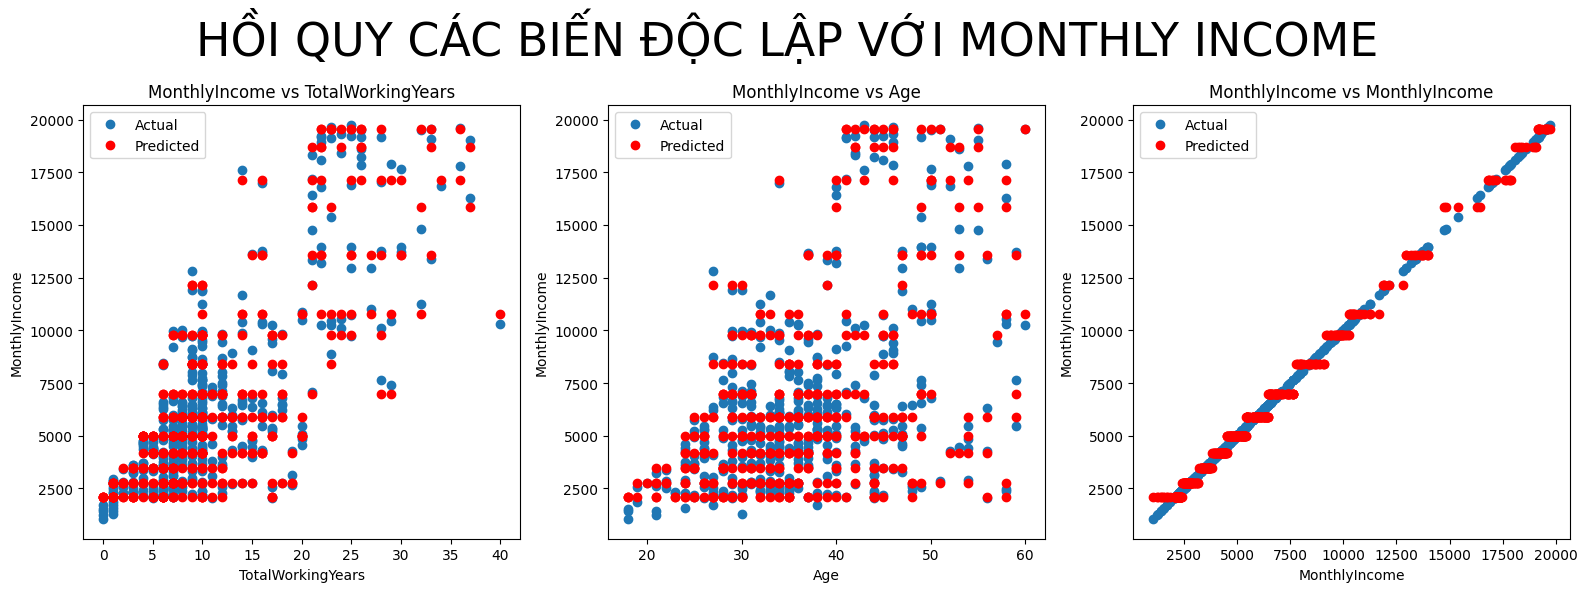

In [54]:
# Vẽ đồ thị

fg,ax = plt.subplots(1, 3, figsize=(16,6))

# Biểu đồ TotalWorkingYears
# Sử dụng các biến đã được định nghĩa từ ô trước
ax[0].plot(x_test_dt.iloc[:, 0], y_test_dt, 'o', label='Actual')
ax[0].plot(x_test_dt.iloc[:, 0], y_pred_dt, 'o', color='red', label='Predicted')
ax[0].set_ylabel("MonthlyIncome")
ax[0].set_xlabel(x_test_dt.columns[0])
ax[0].set_title(f"MonthlyIncome vs {x_test_dt.columns[0]}")
ax[0].legend()

# Biểu đồ Age
# Sử dụng các biến đã được định nghĩa từ ô trước
ax[1].plot(x_test_dt.iloc[:, 1], y_test_dt, 'o', label='Actual')
ax[1].plot(x_test_dt.iloc[:, 1], y_pred_dt, 'o', color='red', label='Predicted')
ax[1].set_ylabel("MonthlyIncome")
ax[1].set_xlabel(x_test_dt.columns[1])
ax[1].set_title(f"MonthlyIncome vs {x_test_dt.columns[1]}")
ax[1].legend()

# Biểu đồ HourlyRate
# Sử dụng các biến đã được định nghĩa từ ô trước
ax[2].plot(x_test_dt.iloc[:, 2], y_test_dt, 'o', label='Actual')
ax[2].plot(x_test_dt.iloc[:, 2], y_pred_dt, 'o', color='red', label='Predicted')
ax[2].set_ylabel("MonthlyIncome")
ax[2].set_xlabel(x_test_dt.columns[2])
ax[2].set_title(f"MonthlyIncome vs {x_test_dt.columns[2]}")
ax[2].legend()


fg.suptitle('HỒI QUY CÁC BIẾN ĐỘC LẬP VỚI MONTHLY INCOME ', fontsize=33)
plt.tight_layout()
plt.show()

### Phân tích kết quả dự báo

In [55]:
feature_importances = model.feature_importances_

if 'x_dt' in globals() and isinstance(x_dt, pd.DataFrame):
    coef_df = pd.DataFrame(feature_importances, index=x_dt.columns, columns=['Tính năng quan trọng'])
    print(coef_df)
else:
    print("x_dt DataFrame không khả dụng.")

                   Tính năng quan trọng
TotalWorkingYears                   0.0
Age                                 0.0
MonthlyIncome                       1.0


In [56]:
import pandas as pd
import numpy as np

# Dự đoán trên dữ liệu mới
new_ad = pd.DataFrame([[149, 22, 12]], columns=['TotalWorkingYears', 'Age', 'HourlyRate'])

new_ad_processed = new_ad[['TotalWorkingYears', 'Age', 'HourlyRate']].values

# Thực hiện dự đoán bằng cách sử dụng mô hình đã được đào tạo
predictions = model.predict(new_ad_processed)

print('Dự đoán',predictions)

Dự đoán [2100.63225806]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Lưu model

In [57]:
dump(model, 'sales_model.joblib')

['sales_model.joblib']

In [58]:
#Load lại model và test
loaded_model = load('sales_model.joblib')

In [59]:
# Assuming you want to use these features for the Decision Tree model
features_for_dt = ['TotalWorkingYears', 'Age', 'HourlyRate']
x_dt = df[features_for_dt]
y_dt = df['MonthlyIncome']

# Split the data for the Decision Tree model
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size=0.3, random_state=42)

# Train the Decision Tree model on the actual data
model = DecisionTreeRegressor(max_depth=4) # You can adjust max_depth
model.fit(x_train_dt, y_train_dt)

new_ad_values = [[149, 22, 12]]
new_ad_df = pd.DataFrame(new_ad_values, columns=['TotalWorkingYears', 'Age', 'HourlyRate'])

# Make the prediction using the trained model
predictions = model.predict(new_ad_df)

print(predictions)

# You can also save and load this correctly trained model
from joblib import dump, load
dump(model, 'sales_model_dt.joblib')
loaded_model_dt = load('sales_model_dt.joblib')

# Predict using the loaded model
predictions_loaded = loaded_model_dt.predict(new_ad_df)
print(predictions_loaded)

[19440.28571429]
[19440.28571429]


In [60]:
#Linear regression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [61]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.4195704154058138
MSE 0.2613372848115682
Rsquared: -6.95


In [62]:
#Ridge regression
from sklearn.linear_model import Ridge
model = Ridge(alpha=10) #alpha hệ số hiệu chỉnh, alpha càng mạnh hiệu chỉnh càng mạnh
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [63]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.345689187144937
MSE 0.17142758022003646
Rsquared: 29.85


In [64]:
#GridSearchCV giúp tìm các bộ hệ số tối ưu cho các model học máy
from sklearn.model_selection import GridSearchCV
alphas = [0.001, 0.01, 0.1, 1, 10]

ridge_model = Ridge()
para = {'alpha':alphas}
grid = GridSearchCV(ridge_model, para, cv = 5, scoring = 'r2')
grid.fit(x_train, y_train)
print(grid.best_params_['alpha'])
print(grid.best_score_)


0.1
0.52842326653987


In [65]:
#Lasso regression
#giúp loại bỏ những biến không cần thiết, những biến có tương quan thấp
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) #alpha càng lớn, càng loại bỏ nhiều biến không cần thiết
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [66]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.4149537361374061
MSE 0.25499915824785163
Rsquared: -4.36


In [67]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [68]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.5523529013282181
MSE 0.44128684160398035
Rsquared: -80.59


In [69]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [70]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.5675358667109217
MSE 0.4060768078434737
Rsquared: -66.18


- Dùng GridSearchCV xác định lại các bộ tham số tối uu cho các thuật toán trên
- Phân tích dự báo Charges cho dataset  theo các thuật toán vừa học


In [71]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [72]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE',MAE)
print('MSE',MSE)
print(f'Rsquared: {r2*100:.2f}')

MAE 0.5167017998269098
MSE 0.3439045637620442
Rsquared: -40.74


In [73]:
#Đánh giá model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R squared:{model.score(x_train,y_train)*100:.2f}') #tỷ lệ %
print(f'R squared:{model.score(x_test,y_test)*100:.2f}') #tỷ lệ %
print(f'R squared:{model.score(x,y)*100:.2f}') #tỷ lệ %

R squared:100.00
R squared:-40.74
R squared:79.16


In [74]:
# Huấn luyện bộ phân loại SVM
from sklearn.svm import SVR # Import Support Vector Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import appropriate regression metrics

# Initialize SVR model (you might need to tune parameters like C, epsilon, gamma)
model = SVR(kernel='rbf')

# Dự đoán trên dữ liệu kiểm tra
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Đánh giá mô hình using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In kết quả
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.43088856390768665
Mean Squared Error (MSE): 0.25719901574578513
R-squared (R2): -0.0525545392437714


Độ chính xác mô hình huấn luyện: 83.93%
Độ chính xác mô hình thử nghiệm: 83.33%


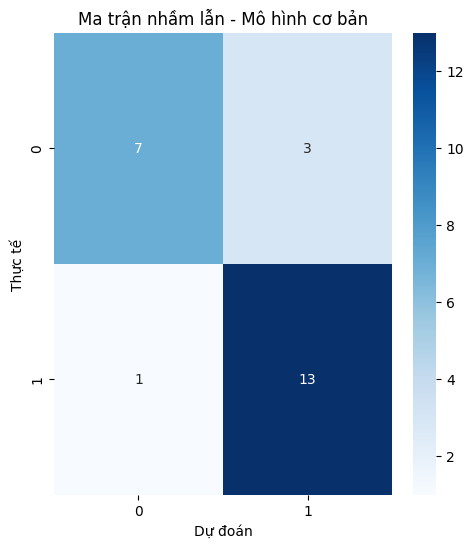

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo lại và đào tạo mô hình hồi quy logistic
classifier_model = LogisticRegression(max_iter=200)
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Tính toán thu nhập trung bình
median_income = y_train_series.median()

# Nhị phân
y_train_classified = (y_train_series > median_income).astype(int)
y_test_classified = (y_test_series > median_income).astype(int)


# Đào tạo mô hình phân loại bằng cách sử dụng biến mục tiêu được phân loại
classifier_model.fit(x_train, y_train_classified)

# Dự đoán trên dữ liệu đào tạo bằng cách sử dụng biến mục tiêu được phân loại
y_train_pred = classifier_model.predict(x_train)
print(f"Độ chính xác mô hình huấn luyện: {accuracy_score(y_train_classified,y_train_pred) * 100:.2f}%")

# đánh giá trên bộ thử nghiệm bằng cách sử dụng biến mục tiêu được phân loại
y_test_pred = classifier_model.predict(x_test)
print(f"Độ chính xác mô hình thử nghiệm: {accuracy_score(y_test_classified,y_test_pred) * 100:.2f}%")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classified, y_test_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn - Mô hình cơ bản')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show() # Hiển thị biểu đồ

Đánh giá mô hình

Độ chính xác cho thấy mô hình hoạt động khá tốt với khoảng 83% dự đoán đúng.

Ma trận nhầm lẫn cho thấy mô hình có xu hướng dự đoán lớp 1 chính xác hơn lớp 0.

Báo cáo phân loại cung cấp cái nhìn sâu sắc về hiệu suất của mô hình cho từng lớp, cho thấy rằng lớp 0 có độ chính xác và độ nhạy cao hơn so với lớp 1.